In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('stud_math.csv')

In [39]:
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                352 non-null    int64  
 1   school               352 non-null    object 
 2   sex                  352 non-null    object 
 3   age                  352 non-null    int64  
 4   address              352 non-null    object 
 5   famsize              352 non-null    object 
 6   pstatus              311 non-null    object 
 7   medu                 350 non-null    float64
 8   fedu                 331 non-null    float64
 9   mjob                 335 non-null    object 
 10  fjob                 320 non-null    object 
 11  reason               337 non-null    object 
 12  guardian             323 non-null    object 
 13  traveltime           329 non-null    float64
 14  studytime            345 non-null    float64
 15  failures             332 non-null    flo

None

,index,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,GP,F,18,U,GT3,A,4.0,4.0,at_home,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,2,GP,F,15,U,LE3,T,1.0,1.0,at_home,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,3,GP,F,15,U,GT3,T,4.0,2.0,health,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,4,GP,F,16,U,GT3,T,3.0,3.0,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
# Переименуем колонки для удобства (изменим заглавные буквы на строчные)
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

### score

In [38]:
# Т.к. "оценка" ("score") это основной параметр, то просто удалим незаполненные строки
df = df[df.score.notna()]

#  В датасете присутсвует 37 значений 'score' равных '0'.
#  Т.к следующее значение равняется '25', то предположим,
# что 0 получили учащиеся, которые не явились на экзамен.
#  Поэтому эти строки также удаляем.
df = df.loc[df['score'] > 0]
df = df.reset_index()

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

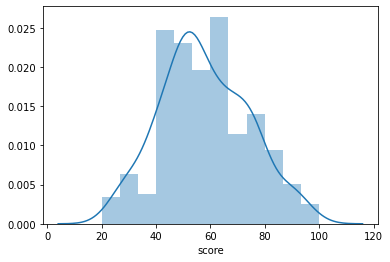

In [6]:
sns.distplot(df.score)
df.score.describe()

### school

In [7]:
df.school.unique()

array(['GP', 'MS'], dtype=object)

GP    311
MS     41
Name: school, dtype: int64

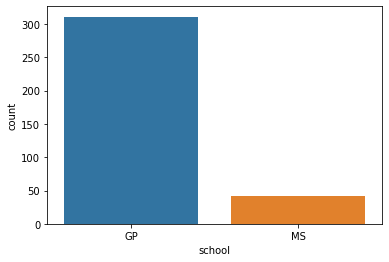

In [20]:
sns.countplot(data = df, x = df.school)
df.school.value_counts()

### sex

F    182
M    170
Name: sex, dtype: int64

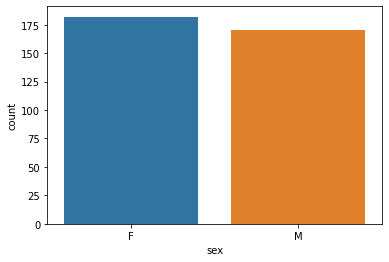

In [19]:
sns.countplot(data = df, x = df.sex)
df.sex.value_counts()

### Age

15    76
16    96
17    90
18    69
19    16
20     3
21     1
22     1
Name: age, dtype: int64

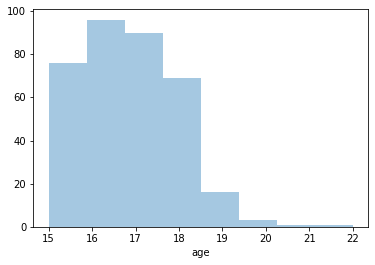

In [21]:
sns.distplot(df.age, kde = False, bins = 8)
df.age.value_counts().sort_index()

### Address

In [29]:
# Заполним пропуски наиболее часто встречающимся значением
df.address.fillna(df.address.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  352 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB


None

U    279
R     73
Name: address, dtype: int64

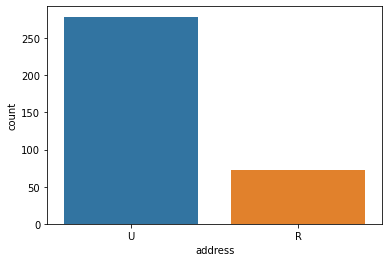

In [32]:
display(df.loc[:, ['address']].info())
sns.countplot(df.address)
df.address.value_counts()

### family size

In [34]:
# Заполним пропуски наиболее часто встречающимся значением
df.famsize.fillna(df.famsize.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


GT3    252
LE3    100
Name: famsize, dtype: int64

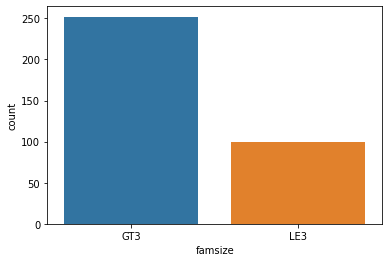

In [41]:
sns.countplot(df.famsize)
df.loc[:,['famsize']].info()
df.famsize.value_counts()

### pstatus

In [43]:
# Заполним пропуски наиболее часто встречающимся значением
df.pstatus.fillna(df.pstatus.value_counts().idxmax(), inplace = True)

In [44]:
df.loc[:,['pstatus']].info()
df.pstatus.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


T    318
A     34
Name: pstatus, dtype: int64

### medu

In [47]:
#  Показатель образования матери сильно коррелирует с показателем образованием отца,
# поэтому проупуски заполним на основе другого показателя

def medu_filling(row):
    if pd.isnull(row['medu']):
        if row['fedu'] == 4:
            return 4
        if row['fedu'] == 3:
            return 3
        if row['fedu'] < 3:
            return 2
        if row['fedu'].isnull():
            return row['medu']
    return row['medu']

4.0    125
2.0     89
3.0     88
1.0     47
0.0      3
Name: medu, dtype: int64

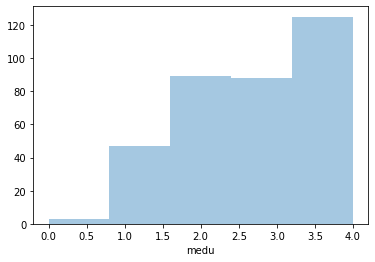

In [50]:
df.medu = df.apply(medu_filling, axis = 1)
sns.distplot(df.medu, bins = 5, kde = False)
df.medu.value_counts()

### fedu

In [57]:
df.fedu.value_counts()

2.0    94
3.0    89
4.0    81
1.0    65
0.0     2
Name: fedu, dtype: int64

In [56]:
# Имеется один выброс, значение которого - 40. Можно считать, что это опечатка. Изменим 40 на 4.
df.at[df.loc[df.fedu == 40].index, 'fedu'] = 4

In [58]:
#  Показатель образования отца сильно коррелирует с показателем образованием отца,
# поэтому проупуски заполним на основе другого показателя

def fedu_filling(row):
    if pd.isnull(row['fedu']):
        if row['medu'] == 4:
            return 4
        if row['medu'] == 3:
            return 3
        if row['medu'] == 2:
            return 2
        if row['medu'] < 2:
            return 1
        if row['medu'].isnull():
            return row['fedu']
    return row['fedu']

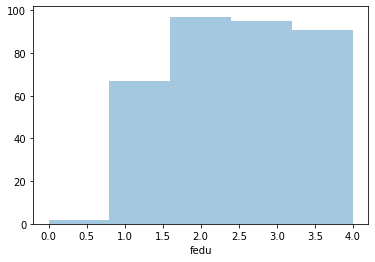

In [59]:
df.fedu = df.apply(fedu_filling, axis = 1)
sns.distplot(df.fedu, bins = 5, kde = False)

### mjob

In [62]:
# Пропуски заполним значением 'other'
df.mjob.fillna(df.mjob.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


other       132
services     90
teacher      51
at_home      49
health       30
Name: mjob, dtype: int64

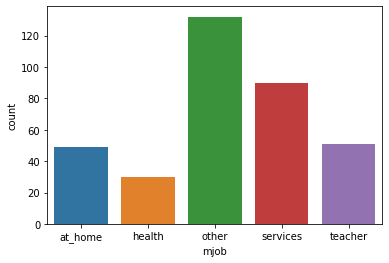

In [64]:
sns.countplot(df.mjob)
df.loc[:, ['mjob']].info()
df.mjob.value_counts()

### fjob

In [65]:
# Пропуски заполним значением 'other'
df.fjob.fillna(df.fjob.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


other       208
services     89
teacher      26
health       15
at_home      14
Name: fjob, dtype: int64

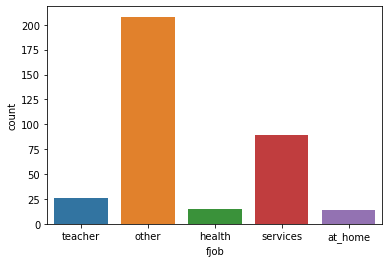

In [66]:
sns.countplot(df.fjob)
df.loc[:, ['fjob']].info()
df.fjob.value_counts()

### reason

In [67]:
df.reason.value_counts()

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

In [69]:
# Т.к. значения приблизительно равные и есть вариант "другое"("other"), именно им мы заполним пропуски
df.reason.fillna(df.reason.value_counts().idxmin(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


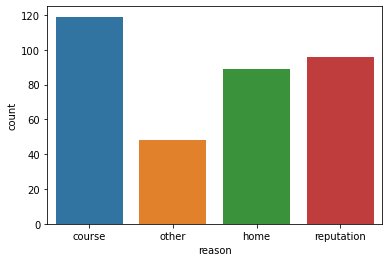

In [70]:
sns.countplot(df.reason)
df.loc[:, ['reason']].info()

### guardian

In [74]:
# Заполним пропуски наиболее часто встречающимся значением
df.guardian.fillna(df.guardian.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


mother    254
father     78
other      20
Name: guardian, dtype: int64

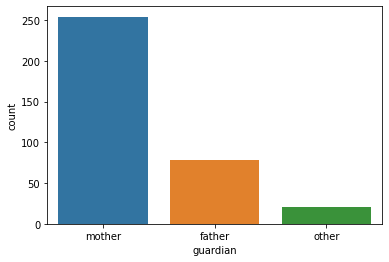

In [82]:
sns.countplot(df.guardian)
df.loc[:, ['guardian']].info()
df.guardian.value_counts()

### travel time

In [80]:
# Подавляющее большинство учеников живет рядом со школой, поэтому заполним пропуски "1"
df.traveltime.fillna(df.traveltime.value_counts().idxmax(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  352 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


1.0    242
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

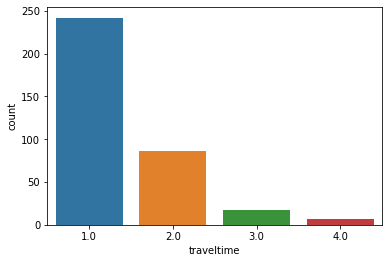

In [83]:
sns.countplot(df.traveltime)
df.loc[:, ['traveltime']].info()
df.traveltime.value_counts()

### studytime

In [ ]:
df['studytime, granular'].describe()

In [ ]:
sns.countplot(df.studytime)

In [ ]:
df.loc[:, ['studytime']].info()

In [ ]:
df.studytime.fillna(df.studytime.value_counts().idxmax(), inplace = True)

In [ ]:
sns.barplot(data=df, x='studytime', y='score')

### failures

In [ ]:
sns.countplot(df.failures)

In [ ]:
df.loc[:, ['failures']].info()

In [ ]:
df.failures.fillna(df.failures.value_counts().idxmax(), inplace = True)

In [ ]:
sns.barplot(data=df, x='failures', y='score')

### schoolsup

In [ ]:
sns.countplot(df.schoolsup)

In [ ]:
df.loc[:, ['schoolsup']].info()

In [ ]:
df.schoolsup.fillna(df.schoolsup.value_counts().idxmax(), inplace = True)

In [ ]:
sns.barplot(data=df, x='schoolsup', y='score')

### famsup

In [ ]:
sns.countplot(df.famsup)

In [ ]:
df.famsup.fillna(df.famsup.value_counts().idxmax(), inplace = True)

In [ ]:
df.loc[:, ['famsup']].info()

In [ ]:
sns.barplot(data=df, x='famsup', y='score')

### paid

In [ ]:
df.paid

In [ ]:
df.loc[:, ['paid']].info()

In [ ]:
sns.countplot(df.paid)

In [ ]:
df.paid.fillna(df.paid.value_counts().idxmax(), inplace=True)

In [ ]:
sns.barplot(data=df, x='paid', y='score')

### activities

In [ ]:
df.activities

In [ ]:
df.loc[:, ['activities']].info()

In [ ]:
sns.countplot(df.activities)

In [ ]:
df[['activities', 'studytime']]

In [ ]:
# Т.к. значения практически равны, заполним пропуски в зависимости от колонки "studytime" — время на учёбу помимо школы в неделю 

In [ ]:
def activities_filling(row):
    if pd.isnull(row['activities']):
        if row['studytime'] == 1:
            return 'no'
        if row['studytime'] > 1:
            return 'yes'
    return row['activities']

In [ ]:
df.activities = df.apply(activities_filling, axis=1)

In [ ]:
sns.countplot(df.activities)

In [ ]:
sns.barplot(data=df, x='activities', y='score')

### nursery

In [ ]:
sns.countplot(df.nursery)

In [ ]:
df.loc[:, ['nursery']].info()

In [ ]:
df.nursery.fillna(df.nursery.value_counts().idxmax(), inplace=True)

In [ ]:
sns.barplot(data=df, x='nursery', y='score')

### higher

In [ ]:
df.loc[:, ['higher']].info()

In [ ]:
sns.countplot(df.higher)

In [ ]:
df.higher.fillna(df.higher.value_counts().idxmax(), inplace=True)

In [ ]:
# Показатель ощутимо влияет на итоговую оценку
sns.barplot(data=df, x='higher', y='score')

### internet

In [ ]:
sns.countplot(df.internet)

In [ ]:
df.loc[:, ['internet']].info()

In [ ]:
df.internet.fillna(df.internet.value_counts().idxmax(), inplace=True)

In [ ]:
sns.barplot(data=df, x='internet', y='score')

### romantic

In [ ]:
sns.countplot(df.romantic)

In [ ]:
df.loc[:, ['romantic']].info()

In [ ]:
df.romantic.fillna(df.romantic.value_counts().idxmax(), inplace=True)

In [ ]:
sns.barplot(data=df, x='romantic', y='score')

### famrel

In [ ]:
sns.countplot(df.famrel)

In [ ]:
df.famrel.value_counts()

In [ ]:
# Присутстувует один выброс. Скорее всего это опечатка - знак "-" лишний, уберем его

In [ ]:
df.loc[df.famrel == -1]

In [ ]:
df.at[25, 'famrel'] = 1

In [ ]:
df.loc[:, ['famrel']].info()

In [ ]:
df.famrel.fillna(df.famrel.value_counts().idxmax(), inplace=True)

In [ ]:
sns.barplot(data=df, x='famrel', y='score')

### freetime

In [ ]:
sns.countplot(df.freetime)

In [ ]:
df.loc[:, ['freetime']].info()

In [ ]:
df.freetime.fillna(df.freetime.value_counts().idxmax(), inplace=True)

In [ ]:
sns.barplot(data=df, x='freetime', y='score')

### goout

In [ ]:
sns.countplot(df.goout)

In [ ]:
df.loc[:, ['goout']].info()

In [ ]:
df.goout.fillna(df.goout.value_counts().idxmax(), inplace=True)

In [ ]:
sns.barplot(data=df, x='goout', y='score')

### health

In [ ]:
sns.countplot(df.health)

In [ ]:
df.loc[:, ['health']].info()

In [ ]:
df.health.fillna(df.health.value_counts().idxmax(), inplace=True)

In [ ]:
sns.barplot(data=df, x='health', y='score')

### absences

In [ ]:
sns.distplot(df.absences, kde=False)

In [ ]:
df.absences.fillna(df.absences.value_counts().idxmax(), inplace=True)

In [ ]:
df.loc[:, ['absences']].info()

In [ ]:
# Параметр содержит большое количество выбросов, давайте отфильтруем его
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(.75)
IQR = perc75 - perc25
print(f'25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, IQR: {IQR}, границы выбросов: [{perc25 - 1.5*IQR}; {perc75 + 1.5*IQR}]')

In [ ]:
df = df.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [ ]:
df['absences_category'] = pd.cut(df['absences'], bins=4, labels=['Low','Mid', 'High_Mid','High'])

In [ ]:
df.drop(columns=['absences_category'], inplace=True)

In [ ]:
df['absences_category']

In [ ]:
df.head()

In [ ]:
sns.barplot(data=df, x='absences_category', y='score')